In [13]:
import tensorflow as tf
import numpy 
import cv2
import matplotlib.pyplot as plt

In [14]:
physical_devices = tf.config.list_physical_devices('GPU')
for device in physical_devices:
    tf.config.experimental.set_memory_growth(device, True)

In [15]:
training_data_path = './seg_train/seg_train'
test_data_path = "./seg_test/seg_test"

In [16]:
IMAGE_SIZE = (150, 150)
BATCH_SIZE = 64

In [17]:

training_data_gn = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1 /255.0,
    
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

test_data_gn = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1 /255.0,
    
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
    )

In [18]:
train_data = training_data_gn.flow_from_directory(
    training_data_path,
    target_size=IMAGE_SIZE,
    color_mode='rgb',
    shuffle=True,
    seed = 42,
    class_mode = 'categorical'
)

validation_data = test_data_gn.flow_from_directory(
    test_data_path,
    target_size=IMAGE_SIZE,
    color_mode='rgb',
    shuffle=True,
    seed = 42,
    class_mode='categorical'
    )

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [19]:
model = None

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32 , (3,3),activation = 'relu',input_shape = (150,150,3) , kernel_regularizer = tf.keras.regularizers.l2(0.01) ))

model.add(tf.keras.layers.MaxPool2D(2,2))
model.add(tf.keras.layers.Conv2D(64,(3,3),activation = 'relu' , kernel_regularizer = tf.keras.regularizers.l2(0.01)))

model.add(tf.keras.layers.MaxPool2D(2,2))
model.add(tf.keras.layers.Conv2D(128,(3,3),activation = 'relu' , kernel_regularizer = tf.keras.regularizers.l2(0.01)))

model.add(tf.keras.layers.MaxPool2D(2,2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(6,activation = 'softmax'))


In [20]:
initial_learning_rate = 0.1
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=100000,
    decay_rate=0.96,
    staircase=True)

In [21]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
loss = "categorical_crossentropy"
metrics = ['accuracy']
model.compile(optimizer = optimizer , loss = loss , metrics=metrics)

In [23]:
history = model.fit(train_data , epochs = 50 , validation_data=validation_data,batch_size = BATCH_SIZE)

Epoch 1/50
439/439 [==============================] - 80s 182ms/step - loss: 0.7279 - accuracy: 0.7900 - val_loss: 0.7430 - val_accuracy: 0.7950
Epoch 2/50
439/439 [==============================] - 82s 187ms/step - loss: 0.7305 - accuracy: 0.7902 - val_loss: 0.7382 - val_accuracy: 0.7827
Epoch 3/50
439/439 [==============================] - 84s 190ms/step - loss: 0.7230 - accuracy: 0.7915 - val_loss: 0.7227 - val_accuracy: 0.7910
Epoch 4/50
439/439 [==============================] - 82s 186ms/step - loss: 0.7325 - accuracy: 0.7848 - val_loss: 0.7172 - val_accuracy: 0.7873
Epoch 5/50
439/439 [==============================] - 80s 182ms/step - loss: 0.7167 - accuracy: 0.7959 - val_loss: 0.7144 - val_accuracy: 0.7873
Epoch 6/50
439/439 [==============================] - 81s 184ms/step - loss: 0.7181 - accuracy: 0.7947 - val_loss: 0.7165 - val_accuracy: 0.7953
Epoch 7/50
 55/439 [==>...........................] - ETA: 57s - loss: 0.6826 - accuracy: 0.8125

KeyboardInterrupt: 

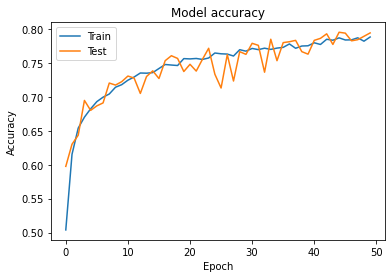

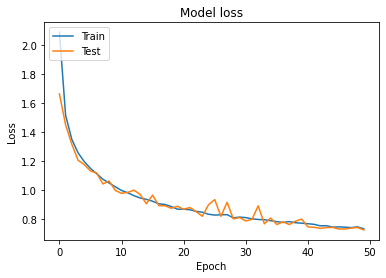

In [24]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [25]:
print(history.history['accuracy'][-1])

0.7886561155319214
